### Exercise 1c)

In [1]:
# Imports

%load_ext autoreload
%autoreload 1

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from utils import generate_dataset

In [2]:
%aimport methods.training_methods, methods.step_methods, methods.regression_methods
from methods.training_methods import GradientDescent, StochasticGradientDescent
from methods.step_methods import ConstantGradientStep, MomentumGradientStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient, Lasso_Gradient
from sklearn.preprocessing import PolynomialFeatures

# Generating dataset
np.random.seed(124)
x, y = generate_dataset()

In [3]:
p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

#np.random.seed(1234)
theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

OLS:  0.8371156696066698


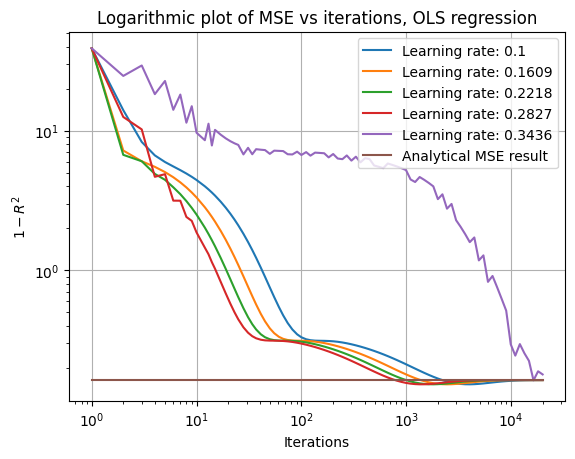

In [4]:
# Ordinary gradient descent for different learning rates, OLS regression
learning_rates = np.linspace(0.1,0.34357,5)   # 0.355 for p = 5

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantGradientStep(learning_rate=learning_rates[i]))
    mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_mse = gd_constant.analytical_OLS_mse()
    plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],4)}")

print("OLS: ",1-analytical_mse)

plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*analytical_mse,label="Analytical MSE result")
plt.xlabel("Iterations")
plt.ylabel(r"$1 - R^2$")
plt.title("Logarithmic plot of MSE vs iterations, OLS regression")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.show()

In [5]:
# Finding theoretical value of maximum learning rate

H = gd_constant.OLS_Hessian()

EigValues, EigVectors = np.linalg.eig(H)

print("Maximum learning rate before exponential blowup: ",2/np.max(EigValues))

Maximum learning rate before exponential blowup:  0.34360076154772373


Ridge:  0.8308420119630023


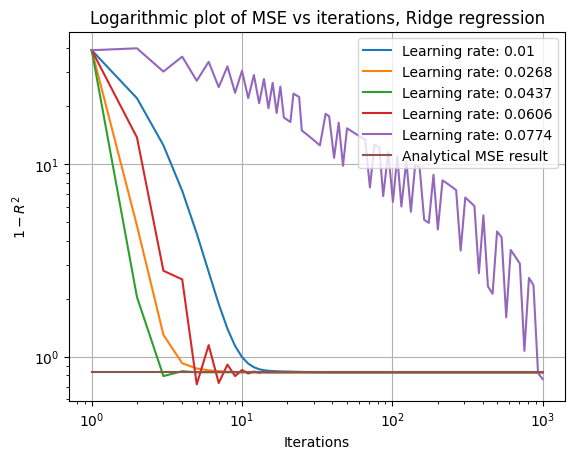

In [6]:
# Performing ordinary gradient descent for Ridge regression

iterations = 10**3

learning_rates = np.linspace(0.01,0.0774,5)

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ConstantGradientStep(learning_rate=learning_rates[i]))
    mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_mse = gd_constant.analytical_Ridge_mse(10**1)
    plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],4)}")

print("Ridge: ",analytical_mse)

plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*analytical_mse,label="Analytical MSE result")
plt.xlabel("Iterations")
plt.ylabel(r"$1 - R^2$")
plt.title("Logarithmic plot of MSE vs iterations, Ridge regression")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.show()

In [7]:
# Finding theoretical value of maximum learning rate

H = gd_constant.Ridge_Hessian(10**1)

EigValues, EigVectors = np.linalg.eig(H)

print("Maximum learning rate before exponential blowup: ",2/np.max(EigValues))

Maximum learning rate before exponential blowup:  0.07745720732058704
